## Day 29 Lecture 2 Assignment

In this assignment, we will learn about entropy and information gain in the ID3 algorithm.

In [2]:
import numpy as np
import pandas as pd
from math import log2
from scipy.stats import entropy

from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz

In [3]:
tennis = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/tennis_decision.csv')

In [4]:
tennis

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


Write a function to compute entropy given an input of a sequence of probabilities.

In [67]:
def get_entropy_beta(data, feature, target):
  xtab = pd.crosstab(data[feature], data[target])
  xtab_sum = xtab.sum(axis=1)
  weighted_entropy = 0.0
  for i in xtab.index:
    feature_weight = 0.0
    feature_entropy = 0.0
    for col in xtab.columns:
      if xtab[col][i] != 0:
        feature_weight += xtab[col][i]
        feature_entropy += -(xtab[col][i]/xtab_sum[i])*log2(xtab[col][i]/xtab_sum[i])
    weighted_entropy += (feature_weight/data.shape[0])*feature_entropy
  
  return weighted_entropy

Aggregate the tennis decision table for each value of each column. Start with Outlook below. Compute the weighted mean of the entropy for outlook (the weighted mean of the yes decision and the no decision).

In [68]:
# answer below:
get_entropy_beta(tennis, 'Outlook', 'Decision')

0.6935361388961918

Compute the weighted mean of the entropy for temperature, humidity and wind as well and decide based on these values which should be the first variable chosen for a split.

In [69]:
# answer below:
for col in tennis.drop(['Day', 'Decision'], 1).columns:
  print(f"{col}: {get_entropy_beta(tennis, col, 'Decision')}")


Outlook: 0.6935361388961918
Temp.: 0.9110633930116763
Humidity: 0.7884504573082896
Wind: 0.8921589282623617


In [ ]:
tennis_df = tennis.copy()
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       14 non-null     int64 
 1   Outlook   14 non-null     object
 2   Temp.     14 non-null     object
 3   Humidity  14 non-null     object
 4   Wind      14 non-null     object
 5   Decision  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [22]:
tennis_df = pd.get_dummies(tennis_df)
tennis_df = tennis_df.drop(['Day', 'Decision_No'], 1)
tennis_df

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temp._Cool,Temp._Hot,Temp._Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Decision_Yes
0,0,0,1,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,1,1
3,0,1,0,0,0,1,1,0,0,1,1
4,0,1,0,1,0,0,0,1,0,1,1
5,0,1,0,1,0,0,0,1,1,0,0
6,1,0,0,1,0,0,0,1,1,0,1
7,0,0,1,0,0,1,1,0,0,1,0
8,0,0,1,1,0,0,0,1,0,1,1
9,0,1,0,0,0,1,0,1,0,1,1


In [25]:
X = tennis_df.drop('Decision_Yes', 1)
Y = tennis_df['Decision_Yes']

In [34]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=2
)

In [35]:
decision_tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

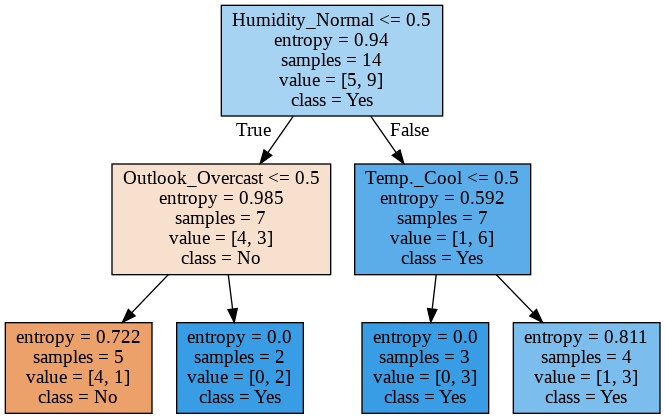

In [36]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())